In [1]:
import os
import sys
import dotenv
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

In [2]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from quantnote_query_api.query_api_client import QuantNoteQueryApi
from quantnote_template import quantnote_template # Import your template here

## Create Query Api Client

In [3]:
dotenv.load_dotenv(".env")
AUTH_TOKEN = os.getenv("AUTH_TOKEN")
client = QuantNoteQueryApi(auth_token=AUTH_TOKEN, api_version="v1")
client

## Create Query and request data

In [4]:
query = """SELECT bucket as time, count(DISTINCT wallet_id) as addresses_count
FROM exchange.arbitrum.series.balance_move_ticks_hourly
WHERE bucket >= now() - interval '2' day
group by 1
order by 1;"""

active_addresses = client.get_data_response(query)
active_addresses['time'] = pd.to_datetime(active_addresses['time'])
active_addresses.set_index('time', inplace=True)
active_addresses['addresses_count'] = pd.to_numeric(active_addresses['addresses_count'])
active_addresses

Waiting for response till limit:   0%|          | 0/600 [00:00<?, ?it/s]

,addresses_count
time,
2023-03-08 00:00:00+00:00,5449
2023-03-08 01:00:00+00:00,7178
2023-03-08 02:00:00+00:00,9624
2023-03-08 03:00:00+00:00,8227
2023-03-08 04:00:00+00:00,9521
2023-03-08 05:00:00+00:00,7594
2023-03-08 06:00:00+00:00,8664
2023-03-08 07:00:00+00:00,9751
2023-03-08 08:00:00+00:00,9243


## Create Plot

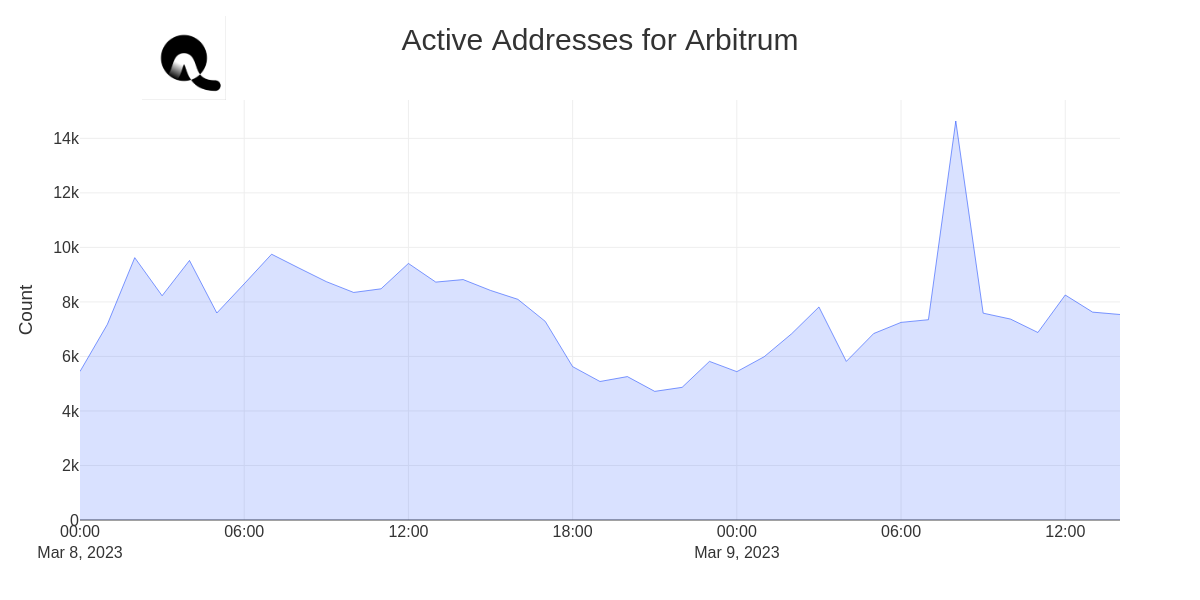

In [5]:
fig = make_subplots()

addr = go.Scatter(x=active_addresses.index.to_list(),
                         y=active_addresses['addresses_count'],
                         name="active addresses",
                         mode='lines',
                         line=dict(width=0.5, color='rgb(3,54,254)'),
                         fill='tozeroy',
                         fillcolor='rgba(3,54,254, 0.15)'
                         )

fig.add_trace(addr)

fig.update_layout(
    width=1200, height=600,
    title="Active Addresses for Arbitrum",
    xaxis_rangeslider_visible=False,
    template='quantnote'
)

# Set y-axes titles
fig.update_yaxes(title_text="Count")

fig.show("png")